<a href="https://colab.research.google.com/github/jesux009/03MIAR-Algoritmos-de-Optimizaci-n/blob/main/Algoritmos_AG1_(Divide_y_vencer%C3%A1s%2C_Voraz%2C_Backtracking).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad Guiada 1 de Algoritmos de Optimizacion


Nombre: Jesús Morales López

https://colab.research.google.com/drive/10R0pt5G2ksaAGOjP4RSNgTrSkFClLfUN?usp=sharing (Pon aquí tu cuaderno)

https://github.com/jesux009/03MIAR-Algoritmos-de-Optimizaci-n (Pon aquí tu proyecto git)



## Torres de Hanoi - Divide y venceras
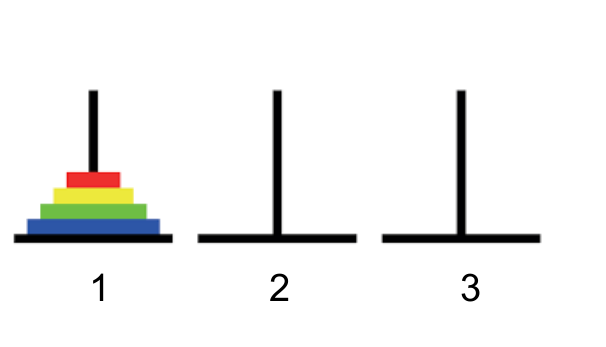

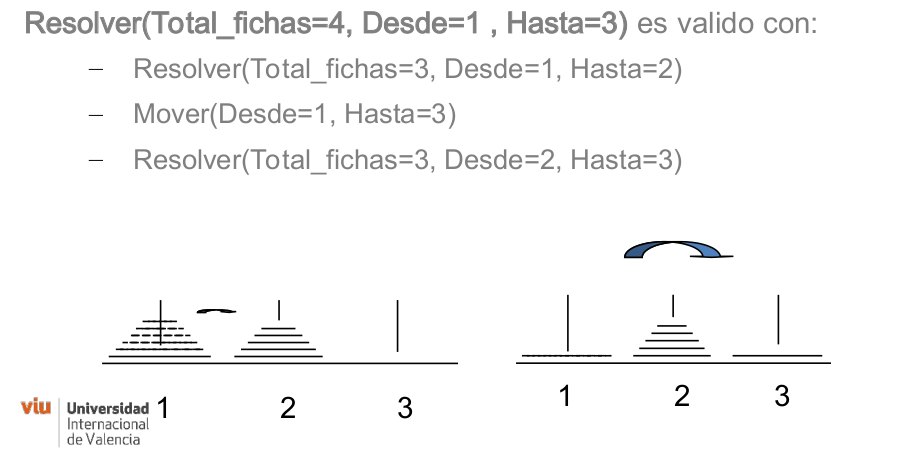

In [16]:
# TORRES DE HANOI - Divide y venceras
################################################################################


def resolver_hanoi(N:int, desde:int, hasta:int):
  """Algoritmo para resolver los pasos para realizar movimiento de una torre de Hanoi (tres torres).

  Argumentos:
    - N (int): Número de fichas
    - desde (int): Torre donde se encuentran las fichas actualmente
    - hasta (int): Torre donde se pretenden mover las fichas

  Muestra:
    - Imprime por pantalla la lista de pasos a realizar de manera ordenada
  """

  # Primero hacemos una comprobación de que los parámetros introducidos son adecuados para la función
  if not isinstance(N, int) or N <= 0 or desde not in (1, 2, 3) or hasta not in (1, 2, 3):
    raise ValueError("Parámetros inválidos. El número de fichas debe ser un entero positivo y los parámetros 'desde' y 'hasta' deben ser enteros en el rango [1,3].")

  # Añadimos una impresión por pantalla para el caso en que hasta = desde
  if hasta == desde:
    print("No es necesario realizar ningún movimiento ya que los parámetros 'desde' y 'hasta' son iguales")
    return

  # Inicializamos el vector del resultado
  if N==1 :
    print("Lleva la ficha desde " + str(desde) + " hasta " + str(hasta))

  else:
    # La fórmula 6-desde-hasta se usa 6 porque hay 3 torres
    # e.g., queremos llevar desde 3 a 2 entonces y resuleta que el primer movimiento será llevar desde 3 a 6-3-2=1
    resolver_hanoi(N-1, desde, 6-desde-hasta)
    print("Lleva la ficha desde " + str(desde) + " hasta " + str(hasta))
    resolver_hanoi(N-1, 6-desde-hasta,  hasta)


################################################################################
resolver_hanoi(5, 3, 3)
################################################################################

No es necesario realizar ningún movimiento ya que los parámetros 'desde' y 'hasta' son iguales


## Cambio de monedas - Técnica voraz

In [25]:
# CAMBIO DE MONEDAS - Técnica voraz
################################################################################


def cambio_monedas(CANTIDAD:int, SISTEMA:list):
  """
  Función para calcular la cantidad y valor de las monedas a devolver al dar el cambio.

  Argumentos:
    CANTIDAD (int): Valor en céntimos del cambio a devolver
    SISTEMA (list): Lista de los valores disponibles para devolver el cambio en un sistema monetario

  Retornos:
    SOLUCIÓN (list): Lista formada por tuplas indicando (valor de la moneda, número de monedas)
    n_monedas (int): Número total de monedas devueltas
  """

  # Primero hacemos una comprobación de que los parámetros introducidos son adecuados para la función
  if not isinstance(CANTIDAD, int) or CANTIDAD <= 0 or not isinstance(SISTEMA, list) or not all(isinstance(moneda, int) and moneda > 0 for moneda in SISTEMA):
    raise ValueError("Parámetros inválidos. La cantidad debe ser un valor entero positivo. El sistema debe ser una lista de valores enteros no repetidos.")
  # En caso de que haya valores repetidos en el sistema (error del input). Devolvemos un aviso pero continuamos operando
  if len(SISTEMA) != len(set(SISTEMA)):
    print('Aviso: El sistema introducido tiene valores repetidos. Se ha convertido a un set con valores únicos. \n')
    SISTEMA = list(set(SISTEMA))

  # Ordenamos el sistema monetario de mayor a más pequeño para casos donde se introduzca de forma errónea (desordenada)
  SISTEMA_SORTED = sorted(SISTEMA, reverse=True)

  # Inicializamos la solución final que se va a dar
  SOLUCION = [0]*len(SISTEMA_SORTED)
  # Inicializamos la variable para cuantificar el valor devuelto
  ValorAcumulado = 0
  # Se devolverá también el número de monedas devueltas totales (ya que el objetivo principal era devolver las menos posibles)
  n_monedas = 0

  # Iteramos a lo largo del sistema monetario ordenado, intentanto usar primero monedas mayores
  for i, valor in enumerate(SISTEMA_SORTED):
    # Calculamos la cantidad de monedas a devolver en este paso basándonos en el valor de la moneda que haya que usar y en lo que queda por devolver
    monedas = (CANTIDAD - ValorAcumulado)//valor
    n_monedas += monedas
    # Añadimos al vector SOLUCIÓN una entrada más indicando una tupla con (valor de la moneda, número de monedas)
    SOLUCION[i] = (valor, monedas)
    # Acumulamos el valor devuelto
    ValorAcumulado = ValorAcumulado + monedas*valor
    # Si con este paso hemos llegado a la solución (devuelto todo el dinero, devolvemos SOLUCIÓN)
    if CANTIDAD == ValorAcumulado:
      return SOLUCION, n_monedas
  # Si no se ha cerrado la función al final del bucle, levantamos un error indicando que no es posible devolver la cantidad pedida con el sistema dado
  raise RuntimeError(f'No es posible realizar la devolución de {CANTIDAD} usando el sistema monetario {SISTEMA_SORTED}.')


################################################################################
SISTEMA = [11, 5, 1]
solucion, n_monedas = cambio_monedas(15, SISTEMA)
print(f'Cambio a devolver: {solucion}')
print(f'Número total de monedas usadas en el cambio: {n_monedas}')
################################################################################


Cambio a devolver: [(11, 1), (5, 0), (1, 4)]
Número total de monedas usadas en el cambio: 5


## N Reinas - Vuelta Atrás (Backtracking)
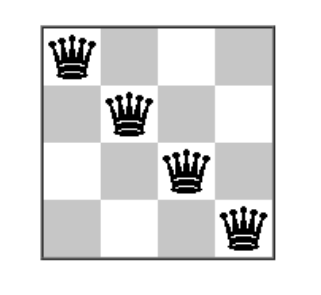

In [45]:
# PROBLEMA DE LAS N REINAS - Vuelta Atrás
################################################################################

# Función para verificar que en la solución parcial no hay amenzas entre reinas
def es_prometedora(SOLUCION:list, etapa:int):
  """
  Función que verifica si para cierta solución dada en cierta etapa, no hay amenzas entre reinas y por lo tanto, la solución es prometedora.

  Argumentos:
    SOLUCIÓN (list): Solución parcial indicando la fila de cada reina colocada. Nótese que cada elemento representa una columna del tablero, por lo que queda implícito que las reinas colocadas no se ven amenazadas en las columnas.
    etapa (int): Número de la etapa actual i.e., columna en la que se pretende colocar la siguiente reina.

  Retornos:
    bool: Indica si para esta solución parcial existe alguna reina amenazada.
  """

  # Comprobación de si existen dos reinas en la misma fila: Si la solución tiene dos valores iguales
  for i in range(etapa + 1):

    # Si para cierta etapa existen dos elementos iguales, quiere decir que se han colocado dos reinas en la misma fila (diferentes columnas) y por lo tanto al estar amenazadas, la solución no es prometedora.
    if SOLUCION.count(SOLUCION[i]) > 1:
      return False

    # Comprobación de si existen dos reinas en la misma diagonal: Si para ciertas columna i y j,
    # el valor absoluto de su diferencia es igual al valor absoluto de la diferencia de las filas donde se han colocado las reinas,
    # significa que las reinas se encuentran amenzadas en la diagonal. Nótese que se comprueba desde la columna actual hasta la siguiente etapa.
    for j in range(i+1, etapa+1):
      if abs(i-j) == abs(SOLUCION[i]-SOLUCION[j]): return False

  # Si no se cumple ninguna de las condiciones anteriores, la solución es prometedora
  return True


# Función para representar una solución en el tablero
def escribe_solucion(S:list):
  """
  Función que representa una solución del problema de las N reinas en el tablero

  Argumentos:
    - S (list): Solución del problema

  Muestra:
    - Representación del tablero de las N reinas con 'x' en las casillas con reinas
  """

  # Tablero cuadrado con la longitud de la solución (N reinas = tablero NxN)
  n = len(S)
  # Iteramos en las columnas del tablero
  for x in range(n):
    # Salto de fila
    print("")
    # Iteramos en las filas del tablero
    for i in range(n):
      # Si para esa columna, se encuentra una reina en esa fila, se representa con una X
      if S[i] == x+1:
        print("[X]" , end="")
      # Si no, se deja la casilla vacía
      else:
        print("[ ]", end="")


# Proceso principal de la resolución de las N-Reinas
def reinas(N:int, solucion:list=[], etapa:int=0):
  """
  Función para encontrar todas las soluciones edl problema de las N reinas.

  Argumentos:
    - N (int): Número de reinas del problema (y por lo tanto tamaño del tablero)
    - solucion (list): Solución parcial del problema para una cierta etapa (sin todas las reinas colocadas). Nótese que cada elemento representa una columna del tablero, por lo que queda implícito que las reinas colocadas no se ven amenazadas en las columnas.
    - etapa (int): Etapa de construcción de la solución (columna en la que se está iterando para colocar la reina)

  Muestra:
    - Imprime por pantalla cada una de las soluciones del problema a medida que se van encontrando. Representando, para cada columna, en qué fila se coloca la reina.
  """

  # Si la solución está vacía (comienzo del problema) se inicializa
  if len(solucion) == 0:
    solucion = [0 for i in range(N) ]

  # Se iteran las filas del tablero con índices de 1 a N
  for i in range(1, N+1):
    # Se inicializa para que en esta etapa, la reina se coloque en la fila i
    solucion[etapa] = i
    # Se comprueba si la solución es prometedora
    if es_prometedora(solucion, etapa):
      # Si la solución es prometedora y la etapa (número de columna) es igual al número de casillas disponibles, la solución está completada
      if etapa == N-1:
        # Imprimimos la solcuión por pantalla para dejarla registrada
        print(solucion)
      else:
        # Si la solución es prometedora pero aún no hemos llegaod al final del tablero, se continúa a la siguiente columna llamando a la función recursivamente
        reinas(N, solucion, etapa+1)
  # Una vez encontrada la solución parcial de una etapa, se resetea para que se puedan encontrar más alternativas colocando a la reina en esa fila
  solucion[etapa] = 0


################################################################################
reinas(5, solucion=[], etapa=0)
################################################################################

[1, 3, 5, 2, 4]
[1, 4, 2, 5, 3]
[2, 4, 1, 3, 5]
[2, 5, 3, 1, 4]
[3, 1, 4, 2, 5]
[3, 5, 2, 4, 1]
[4, 1, 3, 5, 2]
[4, 2, 5, 3, 1]
[5, 2, 4, 1, 3]
[5, 3, 1, 4, 2]


In [42]:
escribe_solucion([4, 1, 3, 5, 2])


[ ][X][ ][ ][ ]
[ ][ ][ ][ ][X]
[ ][ ][X][ ][ ]
[X][ ][ ][ ][ ]
[ ][ ][ ][X][ ]

## Viaje por el río - Programación dinámica

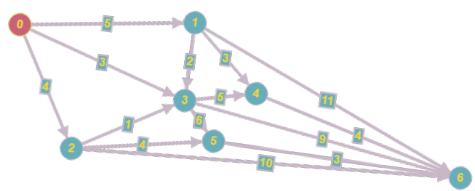

In [75]:
import math

def calcular_precios(TARIFAS:list):
  """
  Función para calcular el coste mínimo entre todos los nodos y la información de los nodos intermedios necesarios para reconstruir la ruta óptima.

  Argumentos:
      TARIFAS (list): Matriz NxN donde TARIFAS[i][j] representa el coste directo de ir del nodo i al nodo j. Si no existe conexión directa, se repesenta con inf.

  Retornos:
      PRECIOS (list): Matriz NxN donde PRECIOS[i][j] representa el coste mínimo conocido para ir del nodo i al j, considerando posibles nodos intermedios.
      RUTA (list): Matriz NxN donde RUTA[i][j] almacena el nodo intermedio k que permite alcanzar el coste mínimo de i a j. Si la ruta es directa, el valor es None.
  """

  # Primero hacemos una comprobación de que los parámetros introducidos son adecuados para la función
  if not isinstance(TARIFAS, list) or len(TARIFAS) == 0 or len(TARIFAS[0]) != len(TARIFAS) or not all(isinstance(elemento, (int, float)) for fila in TARIFAS for elemento in fila):
    raise ValueError("Parámetros inválidos. Las tarifas deben ser una tabla de elementos numéricos de tamaño NxN representando el precio para viajar entre dos nodos.")

  # Total de nodos
  N = len(TARIFAS[0])

  # Inicialización de la tabla de precios
  PRECIOS = [ [float("inf")]*N for _ in range(N) ]
  RUTA    = [ [None]*N for _ in range(N) ]

  # Iteramos en todos los nodos y sus posibles conexions
  for i in range(N-1):
    for j in range(i+1, N):
      # Inicializamos el mínimo y la ruta
      MIN = TARIFAS[i][j]
      RUTA[i][j] = None
      # Se inicializa el precio para viajar entre dos nodos al precio de la tarifa directa
      PRECIOS[i][j] = TARIFAS[i][j]

      # Iteramos para todos los nodos que se encuentran entre el nodo i y el j en esta iteración
      for k in range(i, j):
        # Si se encuentra un caso en que el coste sea menor que el inicializado anteriormente se asigna ese mínimo y se guarda en la tabla de la ruta
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
          MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j])
          RUTA[i][j] = k
        # Se asigna al precio para viajar entre esos dos puntos el mínimo encontrado
        PRECIOS[i][j] = MIN

  # Devolver la tabla de precios y rutas una vez calculados
  return PRECIOS, RUTA


def calcular_ruta(RUTA:list, desde:int, hasta:int):
  """
  Función para reconstruir la ruta óptima entre dos nodos a partir de la matriz de nodos intermedios RUTA.

  Argumentos:
      RUTA (list): Matriz NxN generada por calcular_precios, donde RUTA[i][j] es el nodo intermedio k para alcanzar el coste mínimo de i a j.
      desde (int): Nodo de origen.
      hasta (int): Nodo de destino.

  Retornos:
      ruta (list): Lista con el orden de nodos que forman la ruta óptima desde 'desde' hasta 'hasta'.
  """
  # Primero hacemos una comprobación de que los parámetros introducidos son adecuados para la función
  if not isinstance(RUTA, list) or len(RUTA) == 0 or len(RUTA[0]) != len(RUTA) or not isinstance(desde, int) or not isinstance(hasta, int) or desde >= len(RUTA) or hasta >= len(RUTA):
    raise ValueError("Parámetros inválidos. La ruta deben ser una tabla de tamaño NxN representando los nodos intermedios para viajar entre puntos. Los parámetros 'hasta' y 'desde' deben ser menores que las dimensiones de RUTA.")

  # Caso en el que el origen y el destino impuestos son el mismo
  if desde == hasta:
    return [hasta]

  # Resto de casos
  else:
    # Encontramos el punto intermedio
    k = RUTA[desde][hasta]

    # Si no hay nodo intermedio, la ruta es directa
    if k is None:
        return [desde, hasta]

    # En caso contrario, la ruta pasa por k
    # Se llama a la función para calcular la ruta desde el origen a k
    izquierda = calcular_ruta(RUTA, desde, k)
    # Se llama a la función para calcular la ruta desde k al destino
    derecha   = calcular_ruta(RUTA, k, hasta)

    # Se devuelve la combinación (evitando repetir nodos intermedios)
    return izquierda + derecha[1:]


################################################################################################################
TARIFAS = [[           0,            5,            4,            3, float("inf"), float("inf"), float("inf")],
           [float("inf"),            0, float("inf"),            2,            3, float("inf"),           11],
           [float("inf"), float("inf"),            0,            1, float("inf"),            4,           10],
           [float("inf"), float("inf"), float("inf"),            0,            5,            6,            9],
           [float("inf"), float("inf"), float("inf"), float("inf"),            0, float("inf"),            4],
           [float("inf"), float("inf"), float("inf"), float("inf"), float("inf"),            0,            3],
           [float("inf"), float("inf"), float("inf"), float("inf"), float("inf"), float("inf"),            0]]


PRECIOS, RUTA = calcular_precios(TARIFAS)
RUTA_OPTIMA = calcular_ruta(RUTA, 0, 6)

print('La ruta es:')
print(" - ".join(map(str, RUTA_OPTIMA)))
################################################################################################################

La ruta es:
0 - 2 - 5 - 6


# Actividad Adicional AG1: Encontrar los puntos más cercanos

## Fuerza bruta

In [82]:
import time

def medir_tiempo(func):
  """
  Decorador para medir y mostrar el tiempo de ejecución de una función.

  Argumentos:
      func (callable): Función a decorar.

  Retorna:
      wrapper: Función decorada que ejecuta 'func' y muestra el tiempo que tardó.
  """

  def wrapper(*args, **kwargs):
    # Tiempo inicial
    inicio = time.time()
    # Ejecución de la función
    res = func(*args, **kwargs)
    # Tiempo final e impresión del tiempo
    fin = time.time()
    print(f"Tiempo de ejecución: {fin - inicio:.6f} segundos")
    return res
  return wrapper

In [101]:
import math
import numpy as np

# Primera intuición: usar fuerza bruta

@medir_tiempo
def PuntosMasCercanos1D_FuerzaBruta(puntos:list):
  """
  Función para encontrar la pareja de puntos más cercana en una lista usando fuerza bruta

  Argumentos:
    - puntos (list): Lista de puntos

  Retornos:
    - puntos_mas_cercanos (tuple): Pareja de puntos más cercanos encontrada
    - min_distancia (float): Distancia entre los puntos
  """

  # Inicializamos la distancia mínima
  min_distancia = float("inf")
  puntos_mas_cercanos = (None, None)

  # Iterar por todas las parejas de puntos posible
  for i in range(len(puntos)):
    for j in range(len(puntos)):
      # Sólo calcular distancia si no se trata del mismo número
      if i!=j:
        dist = abs(puntos[i] - puntos[j])
        # Si la distancia es menor al mínimo actual, reemplazamos la pareja de puntos por estos puntos y la distancia por esta distancia
        if dist < min_distancia:
          min_distancia = dist
          puntos_mas_cercanos = (puntos[i], puntos[j])
  # Una vez iterado en todas las posibles parejas, retornar los resultados
  return min_distancia, puntos_mas_cercanos


################################################################################
puntos = [np.random.random()*10000 for _ in range(1000)]
resultado = PuntosMasCercanos1D_FuerzaBruta(puntos)
print(f'Puntos más cercanos: {resultado[1]} con distancia {resultado[0]}')

# Pierde eficiencia extremadamente deprisa con el tamaño del vector puntos (O[n^2])


Tiempo de ejecución: 0.089282 segundos
Puntos más cercanos: (3165.7657696211927, 3165.7811171953654) con distancia 0.01534757417266519


## Ordenando

In [110]:
import math
import numpy as np

# Segunda intuición: ordenar la lista y comparar cada punto con sus vecinos

@medir_tiempo
def PuntosMasCercanos1D_Orden(puntos:list):
  """
  Función para encontrar la pareja de puntos más cercana en una lista ordenando los puntos

  Argumentos:
    - puntos (list): Lista de puntos

  Retornos:
    - puntos_mas_cercanos (tuple): Pareja de puntos más cercanos encontrada
    - min_distancia (float): Distancia entre los puntos
  """

  # Primero ordenamos los puntos
  puntos_ordenados = sorted(puntos)

  # Inicializamos la distancia mínima
  min_distancia = float("inf")
  puntos_mas_cercanos = (None, None)

  # Iterar por todas las parejas de puntos posible
  i = 0
  while i < (len(puntos_ordenados)-1):
    dist = abs(puntos_ordenados[i] - puntos_ordenados[i+1])
    # Si la distancia es menor al mínimo actual, reemplazamos la pareja de puntos por estos puntos y la distancia por esta distancia
    if dist < min_distancia:
      min_distancia = dist
      puntos_mas_cercanos = (puntos_ordenados[i], puntos_ordenados[i+1])
    i += 1
  # Una vez iterado en todas las posibles parejas, retornar los resultados
  return min_distancia, puntos_mas_cercanos


################################################################################

puntos = [np.random.random()*10000 for _ in range(1000000)]
resultado = PuntosMasCercanos1D_Orden(puntos)
print(f'Puntos más cercanos: {resultado[1]} con distancia {resultado[0]}')
# Comparado con el intento anterior, este método es un par de órdenes de magnitud más rápido (O[n*log(n)])

Tiempo de ejecución: 0.673373 segundos
Puntos más cercanos: (2935.6035836977944, 2935.603583700618) con distancia 2.8235263016540557e-09


## Recursividad

In [112]:
# Función para calcular los dos puntos más cercanos en una lista por fuerza bruta (sin decorador)
def PuntosMasCercanos1D_FuerzaBruta(puntos:list):
  """
  Función para encontrar la pareja de puntos más cercana en una lista usando fuerza bruta

  Argumentos:
    - puntos (list): Lista de puntos

  Retornos:
    - puntos_mas_cercanos (tuple): Pareja de puntos más cercanos encontrada
    - min_distancia (float): Distancia entre los puntos
  """

  # Inicializamos la distancia mínima
  min_distancia = float("inf")
  puntos_mas_cercanos = (None, None)

  # Iterar por todas las parejas de puntos posible
  for i in range(len(puntos)):
    for j in range(len(puntos)):
      # Sólo calcular distancia si no se trata del mismo número
      if i!=j:
        dist = abs(puntos[i] - puntos[j])
        # Si la distancia es menor al mínimo actual, reemplazamos la pareja de puntos por estos puntos y la distancia por esta distancia
        if dist < min_distancia:
          min_distancia = dist
          puntos_mas_cercanos = (puntos[i], puntos[j])
  # Una vez iterado en todas las posibles parejas, retornar los resultados
  return min_distancia, puntos_mas_cercanos

@medir_tiempo
def PuntosMasCercanos1D_Recursivo(puntos:list):
    """
    Función recursiva para encontrar la pareja de puntos más cercana en 1D usando estrategia de 'divide y vencerás' y recursividad.

    Argumentos:
        - puntos (list): Lista de puntos

    Retorna:
        - min_distancia (float): Distancia mínima encontrada
        - puntos_mas_cercanos (tuple): Pareja de puntos correspondientes
    """

    # Paso 0: ordenar los puntos al inicio
    puntos_ordenados = sorted(puntos)

    def cercania_recursividad_1D(puntos_sub):
        n = len(puntos_sub)

        # Caso base: si solo hay 2 o 3 puntos, usamos fuerza bruta
        if n <= 3:
            min_dist, pareja_min = PuntosMasCercanos1D_FuerzaBruta(puntos_sub)

        else:
          # Dividir en dos mitades
          mid = n // 2
          izq = puntos_sub[:mid]
          der = puntos_sub[mid:]

          # Llamadas recursivas a cada una de esas mitades
          dist_izq, pareja_izq = cercania_recursividad_1D(izq)
          dist_der, pareja_der = cercania_recursividad_1D(der)

          # Se evalúa qué distancia y pareja es la mejor de cada mitad
          if dist_izq < dist_der:
              min_dist = dist_izq
              pareja_min = pareja_izq
          else:
              min_dist = dist_der
              pareja_min = pareja_der

          # Adicionalmente, se revisa si los puntos adyacentes entre la mitad izquierda y derecha son la mejor solución
          dist_frontera = der[0] - izq[-1]
          if dist_frontera < min_dist:
              min_dist = dist_frontera
              pareja_min = (izq[-1], der[0])

        return min_dist, pareja_min

    # Llamada inicial a la recursión
    return cercania_recursividad_1D(puntos_ordenados)


################################################################################

puntos = [np.random.random()*10000 for _ in range(1000000)]
resultado = PuntosMasCercanos1D_Recursivo(puntos)
print(f'Puntos más cercanos: {resultado[1]} con distancia {resultado[0]}')

# Con recursividad, el problema se puede hacer más compacto y extendible

Tiempo de ejecución: 1.575870 segundos
Puntos más cercanos: (4029.317685498174, 4029.317685504191) con distancia 6.017216946929693e-09


## Caso 2D

In [115]:
# Función para calcular la distancia entre dos puntos en 2D
def distancia2D(p1, p2):
    return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5

# Función para calcular los dos puntos 2D más cercanos en una lista por fuerza bruta (sin decorador)
def PuntosMasCercanos2D_FuerzaBruta(puntos:list):
    min_dist = float("inf")
    pareja_min = (None, None)
    n = len(puntos)
    for i in range(n):
      for j in range(i+1, n):
        d = distancia2D(puntos[i], puntos[j])
        if d < min_dist:
          min_dist = d
          pareja_min = (puntos[i], puntos[j])
    return min_dist, pareja_min

@medir_tiempo
def PuntosMasCercanos2D_Recursivo(puntos):
  """
  Encuentra la pareja de puntos más cercana en 2D usando divide y vencerás.

  Argumentos:
      - puntos (list): Lista de tuplas [(x1,y1), (x2,y2), ...]

  Retorna:
      - min_dist (float): Distancia mínima entre los dos puntos más cercanos
      - pareja (tuple): Tupla que contiene las coordenadas 2D de los puntos más cercanos de la lista
  """

  # Ordenamos la lista de puntos, primero por su coordenada x (Px) y luego por la y (Py)
  Px = sorted(puntos, key=lambda p: p[0])
  Py = sorted(puntos, key=lambda p: p[1])

  # Función recursiva divide y vencerás
  def cercania_recursividad_2D(Px, Py):
      n = len(Px)
      if n <= 3:
        return PuntosMasCercanos2D_FuerzaBruta(Px)

      else:
        # Calculamos la mitad y dividimos la lista de puntos ordenados en X en dos sublistas Qx y Rx (cada una estará ordenada en consecuencia)
        mid = n // 2
        Qx = Px[:mid]
        Rx = Px[mid:]
        mid_x = Px[mid][0]

        # Calculamos la mitad y dividimos la lista de puntos ordenados en Y en dos sublistas Qy y Ry
        # Sin embargo, tendremos en cuenta el punto que hay en mitad de esta sublista y aquellos que esté en Qx irán a Qy y aquellos que estén en Rx irán a Ry
        Qy = []
        Ry = []
        for p in Py:
            if p[0] <= mid_x:
                Qy.append(p)
            else:
                Ry.append(p)

        # Llamadas recursivas a cada una de esas mitades
        dist_Q, pair_Q = cercania_recursividad_2D(Qx, Qy)
        dist_R, pair_R = cercania_recursividad_2D(Rx, Ry)

        # Se evalúa qué distancia y pareja es la mejor de cada mitad
        if dist_Q < dist_R:
            min_dist = dist_Q
            pareja_min = pair_Q
        else:
            min_dist = dist_R
            pareja_min = pair_R

        # Ya que la pareja más cercana podría estar en cada una de las mitades, hay que evaluar la frontera
        # Construimos strip a partir de la línea divisoria de X (mid_x)
        # strip = Todos los puntos cuya coordenada x está a menos de min_dist de esta línea divisoria
        strip = [p for p in Py if abs(p[0] - mid_x) < min_dist]

        # Revisar cada punto en el strip .
        # Si la distancia es menor que min_dist, actualizamos min_dist y guardamos la pareja
        for i in range(len(strip)):
            for j in range(i+1, len(strip)):
                d = distancia2D(strip[i], strip[j])
                if d < min_dist:
                    min_dist = d
                    pareja_min = (strip[i], strip[j])

      return min_dist, pareja_min

  return cercania_recursividad_2D(Px, Py)

################################################################################

puntos = [(np.random.random()*10000, np.random.random()*10000) for _ in range(100000)]
resultado = PuntosMasCercanos2D_Recursivo(puntos)
print(f'Puntos más cercanos: {resultado[1]} con distancia {resultado[0]}')

Tiempo de ejecución: 2.775751 segundos
Puntos más cercanos: ((1708.753938737031, 354.2640239615458), (1708.83196209073, 354.2932436868873)) con distancia 0.08331528114032234
